# Load the file

In [ ]:
import pandas as pd

file_path = '/Users/soichirotanabe/Desktop/TM470/K-means.csv'

# Read the file without parsing dates
df = pd.read_csv(file_path, low_memory=False)
print(df.columns)



df.head()

Index(['Household number', 'Children', 'Documentaries', 'Entertainment',
       'Lifestyle', 'Movies&Dramas', 'Music', 'News', 'Sport', 'VOD',
       'Total Duration', 'Peak Viewing Time', 'Total Recording'],
      dtype='object')


,Household number,Children,Documentaries,Entertainment,Lifestyle,Movies&Dramas,Music,News,Sport,VOD,Total Duration,Peak Viewing Time,Total Recording
0,38742_1,0.0,0.06,0.41,0.09,0.19,0.0,0.21,0.03,0.00,513,Evening,0
1,38742_2,0.0,0.05,0.56,0.03,0.12,0.0,0.24,0.00,0.00,317,Evening,0
2,38759_1,0.0,0.05,0.50,0.22,0.00,0.0,0.11,0.00,0.13,947,Afternoon,549
3,38762_1,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,38,Evening,0
4,38762_2,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,38,Evening,0


# Clean the data

In [ ]:
# Clean the columns
df['Leisure_group'] = (
    df['Entertainment'] +
    df['Movies&Dramas'] +
    df['Children'] +
    df['Lifestyle'] + df['Music']
)

df['Factual_group'] = df['News'] + df['Documentaries']
df['Sport_group'] = df['Sport']
df['VOD_group'] = df['VOD']
df

,Household number,Children,Documentaries,Entertainment,Lifestyle,Movies&Dramas,Music,News,Sport,VOD,Total Duration,Peak Viewing Time,Total Recording,Leisure_group,Factual_group,Sport_group,VOD_group
0,38742_1,0.0,0.06,0.41,0.09,0.19,0.00,0.21,0.03,0.00,513,Evening,0,0.69,0.27,0.03,0.00
1,38742_2,0.0,0.05,0.56,0.03,0.12,0.00,0.24,0.00,0.00,317,Evening,0,0.71,0.29,0.00,0.00
2,38759_1,0.0,0.05,0.50,0.22,0.00,0.00,0.11,0.00,0.13,947,Afternoon,549,0.72,0.16,0.00,0.13
3,38762_1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,38,Evening,0,0.00,0.00,0.00,1.00
4,38762_2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,38,Evening,0,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,90104_2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,54,Midnight,0,0.00,0.00,0.00,1.00
9988,90120_1,0.0,0.00,0.55,0.00,0.00,0.45,0.00,0.00,0.00,94,Midnight,93,1.00,0.00,0.00,0.00
9989,90120_2,0.0,0.00,0.65,0.00,0.13,0.22,0.00,0.00,0.01,191,Evening,134,1.00,0.00,0.00,0.01
9990,90126_1,0.0,0.48,0.00,0.52,0.00,0.00,0.00,0.00,0.00,111,Evening,0,0.52,0.48,0.00,0.00


In [192]:
def classify_recorder(x):
    if x >= 120:
        return 1
    elif x >= 90:
        return 0.75
    elif x >= 60:
        return 0.5
    elif x > 0:
        return 0.25
    else:
        return 0

df['is_recorder'] = df['Total Recording'].apply(classify_recorder)
df

,Household number,Children,Documentaries,Entertainment,Lifestyle,Movies&Dramas,Music,News,Sport,VOD,Total Duration,Peak Viewing Time,Total Recording,Leisure_group,Factual_group,Sport_group,VOD_group,is_recorder
0,38742_1,0.0,0.06,0.41,0.09,0.19,0.00,0.21,0.03,0.00,513,Evening,0,0.69,0.27,0.03,0.00,0.00
1,38742_2,0.0,0.05,0.56,0.03,0.12,0.00,0.24,0.00,0.00,317,Evening,0,0.71,0.29,0.00,0.00,0.00
2,38759_1,0.0,0.05,0.50,0.22,0.00,0.00,0.11,0.00,0.13,947,Afternoon,549,0.72,0.16,0.00,0.13,1.00
3,38762_1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,38,Evening,0,0.00,0.00,0.00,1.00,0.00
4,38762_2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,38,Evening,0,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,90104_2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,54,Midnight,0,0.00,0.00,0.00,1.00,0.00
9988,90120_1,0.0,0.00,0.55,0.00,0.00,0.45,0.00,0.00,0.00,94,Midnight,93,1.00,0.00,0.00,0.00,0.75
9989,90120_2,0.0,0.00,0.65,0.00,0.13,0.22,0.00,0.00,0.01,191,Evening,134,1.00,0.00,0.00,0.01,1.00
9990,90126_1,0.0,0.48,0.00,0.52,0.00,0.00,0.00,0.00,0.00,111,Evening,0,0.52,0.48,0.00,0.00,0.00


In [ ]:
df['log_total_duration'] = np.log1p(df['Total Duration'])
df

,Household number,Children,Documentaries,Entertainment,Lifestyle,Movies&Dramas,Music,News,Sport,VOD,Total Duration,Peak Viewing Time,Total Recording,Leisure_group,Factual_group,Sport_group,VOD_group,is_recorder,log_total_duration
0,38742_1,0.0,0.06,0.41,0.09,0.19,0.00,0.21,0.03,0.00,513,Evening,0,0.69,0.27,0.03,0.00,0.00,6.242223
1,38742_2,0.0,0.05,0.56,0.03,0.12,0.00,0.24,0.00,0.00,317,Evening,0,0.71,0.29,0.00,0.00,0.00,5.762051
2,38759_1,0.0,0.05,0.50,0.22,0.00,0.00,0.11,0.00,0.13,947,Afternoon,549,0.72,0.16,0.00,0.13,1.00,6.854355
3,38762_1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,38,Evening,0,0.00,0.00,0.00,1.00,0.00,3.663562
4,38762_2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,38,Evening,0,0.00,0.00,0.00,1.00,0.00,3.663562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,90104_2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,54,Midnight,0,0.00,0.00,0.00,1.00,0.00,4.007333
9988,90120_1,0.0,0.00,0.55,0.00,0.00,0.45,0.00,0.00,0.00,94,Midnight,93,1.00,0.00,0.00,0.00,0.75,4.553877
9989,90120_2,0.0,0.00,0.65,0.00,0.13,0.22,0.00,0.00,0.01,191,Evening,134,1.00,0.00,0.00,0.01,1.00,5.257495
9990,90126_1,0.0,0.48,0.00,0.52,0.00,0.00,0.00,0.00,0.00,111,Evening,0,0.52,0.48,0.00,0.00,0.00,4.718499


In [194]:
peak_time_map = {
    'Early_morning': 0.0,
    'Morning': 0.25,
    'Afternoon': 0.5,
    'Evening': 0.75,
    'Midnight': 1.0
}

df['peak_time_numeric'] = df['Peak Viewing Time'].map(peak_time_map)


In [195]:
df

,Household number,Children,Documentaries,Entertainment,Lifestyle,Movies&Dramas,Music,News,Sport,VOD,Total Duration,Peak Viewing Time,Total Recording,Leisure_group,Factual_group,Sport_group,VOD_group,is_recorder,log_total_duration,peak_time_numeric
0,38742_1,0.0,0.06,0.41,0.09,0.19,0.00,0.21,0.03,0.00,513,Evening,0,0.69,0.27,0.03,0.00,0.00,6.242223,0.75
1,38742_2,0.0,0.05,0.56,0.03,0.12,0.00,0.24,0.00,0.00,317,Evening,0,0.71,0.29,0.00,0.00,0.00,5.762051,0.75
2,38759_1,0.0,0.05,0.50,0.22,0.00,0.00,0.11,0.00,0.13,947,Afternoon,549,0.72,0.16,0.00,0.13,1.00,6.854355,0.50
3,38762_1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,38,Evening,0,0.00,0.00,0.00,1.00,0.00,3.663562,0.75
4,38762_2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,38,Evening,0,0.00,0.00,0.00,1.00,0.00,3.663562,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,90104_2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,54,Midnight,0,0.00,0.00,0.00,1.00,0.00,4.007333,1.00
9988,90120_1,0.0,0.00,0.55,0.00,0.00,0.45,0.00,0.00,0.00,94,Midnight,93,1.00,0.00,0.00,0.00,0.75,4.553877,1.00
9989,90120_2,0.0,0.00,0.65,0.00,0.13,0.22,0.00,0.00,0.01,191,Evening,134,1.00,0.00,0.00,0.01,1.00,5.257495,0.75
9990,90126_1,0.0,0.48,0.00,0.52,0.00,0.00,0.00,0.00,0.00,111,Evening,0,0.52,0.48,0.00,0.00,0.00,4.718499,0.75


In [196]:
df = df[[
    'Household number',
    'Leisure_group',
    'Factual_group',
    'Sport_group',
    'VOD_group',
    #'is_recorder',
    #'log_total_duration',
    #'peak_time_numeric'
]]

df

,Household number,Leisure_group,Factual_group,Sport_group,VOD_group
0,38742_1,0.69,0.27,0.03,0.00
1,38742_2,0.71,0.29,0.00,0.00
2,38759_1,0.72,0.16,0.00,0.13
3,38762_1,0.00,0.00,0.00,1.00
4,38762_2,0.00,0.00,0.00,1.00
...,...,...,...,...,...
9987,90104_2,0.00,0.00,0.00,1.00
9988,90120_1,1.00,0.00,0.00,0.00
9989,90120_2,1.00,0.00,0.00,0.01
9990,90126_1,0.52,0.48,0.00,0.00


# Elbow Method 

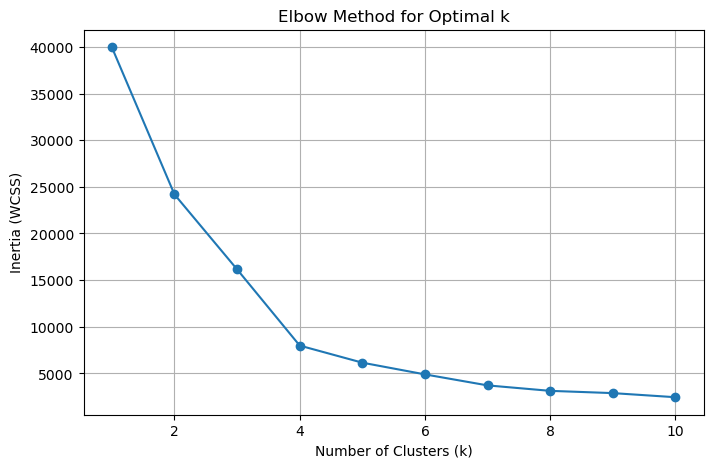

In [197]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# STEP 1: Drop the household identifier for clustering
X = df.drop(columns=['Household number'])

# STEP 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 3: Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# STEP 4: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


#### Elbow Observation
There is a clear inflection point around k = 4

After k = 4, the reduction in inertia (WCSS) slows down noticeably

Beyond k = 6, the curve flattens, suggesting additional clusters bring only marginal improvement 



# silhouette_score

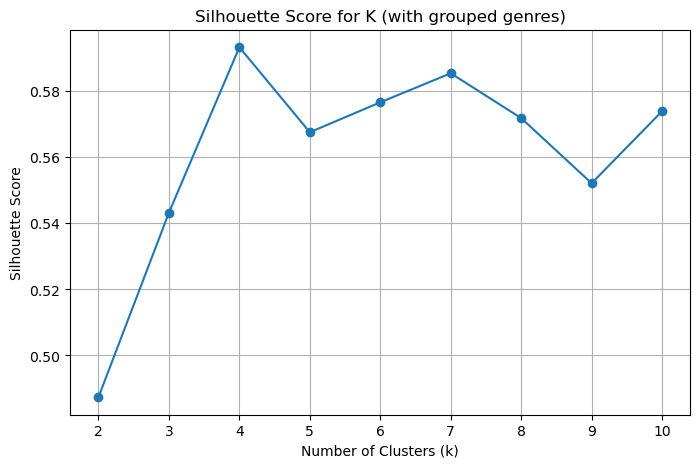

In [198]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []
k_range = range(2, 11)  # Note: silhouette requires at least k=2

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K (with grouped genres)')
plt.grid(True)
plt.show()


Several variations of the feature set were tested during the clustering process, including features such as peak_time_numeric, log_total_duration, and is_recorder. However, these additions resulted in lower silhouette scores and reduced cluster separation.

The best-performing model, achieving a silhouette score of approximately 0.58
